In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize




In [3]:
def load_images(path, image_size):
    images = []
    for filename in os.listdir(path):
        img = imread(os.path.join(path, filename))
        img = resize(img, image_size)
        img = img.flatten()
        images.append(img)
    return np.array(images)

image_folder = "D:\AI Project\Images_KNN\Images_KNN"
image_size = (256, 256) 
images = load_images(image_folder, image_size)

# Step 2: Standardize data
scaler = StandardScaler()
scaled_images = scaler.fit_transform(images)

# Step 3: Apply K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_images)
print("end")

C:\Users\Pranita\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranita\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


end


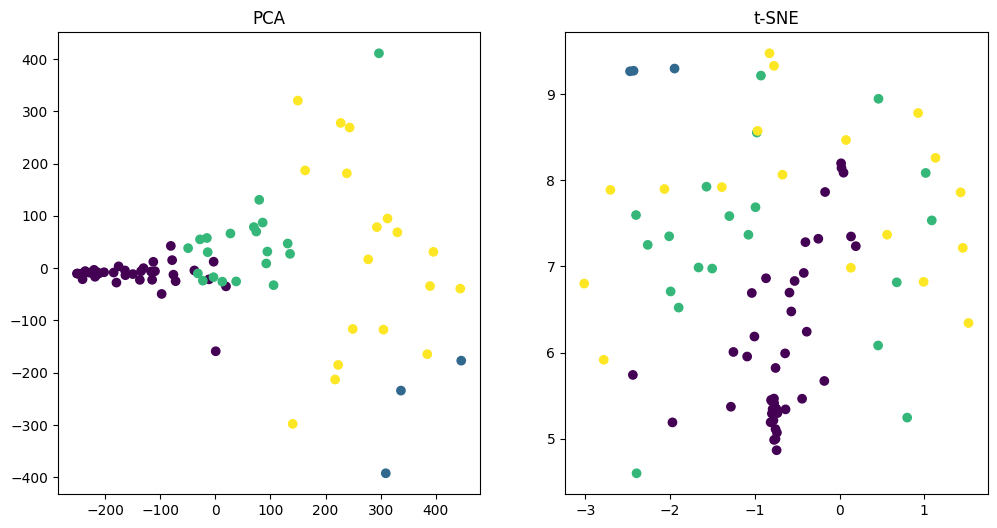

end


In [5]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_images)
tsne_result = tsne.fit_transform(scaled_images)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_)
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_)
plt.title('t-SNE')

plt.show()
print("end")

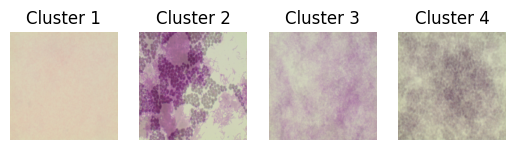

In [6]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers):
    plt.subplot(1, n_clusters, i+1)
    cluster_image = center.reshape(256,256,3)  # Reshape to the original image size
    plt.imshow(cluster_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i+1}')

plt.show()


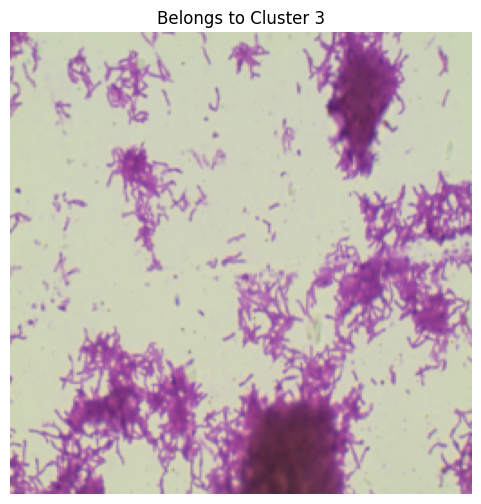

end


In [7]:
import random

random_image_index = random.randint(0, len(images) - 1)
random_image = images[random_image_index]
scaled_random_image = scaler.transform([random_image])
cluster_assignment = kmeans.predict(scaled_random_image)


plt.figure(figsize=(6, 6))
plt.imshow(random_image.reshape(256,256,3), cmap='gray')
plt.axis('off')
plt.title(f'Belongs to Cluster {cluster_assignment[0] + 1}')
plt.show()
print("end")
